In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="YWCnJwSVH5kBXPc3RSoc")
project = rf.workspace("jacob-solawetz").project("pascal-voc-2012")
version = project.version(13)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 91.4 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [ ]:
!wget 'https://www.dropbox.com/scl/fi/0rucuwku6f3plejf9gh70/8l-50-epochsbest.pt?rlkey=l2p7enoqa54zkbn2putoe451c&st=kqjdx2w6&dl=1'


--2025-06-24 14:06:48--  https://www.dropbox.com/scl/fi/0rucuwku6f3plejf9gh70/8l-50-epochsbest.pt?rlkey=l2p7enoqa54zkbn2putoe451c&st=kqjdx2w6&dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4dfa806251b8adc8ed82299048.dl.dropboxusercontent.com/cd/0/inline/CsOY1Rql1YqOoFY4TygbpqW5bp1wHBS1xYRAfntVt7O-POZzM8X54V9Jd-pxzKHs8_TL-eBDux-9FV4rKrVCpW-ojrNV10PPV1dpqv1fpwc8aiVkFl8J59kK9IG4NxnSRmbaUV6w3qlXiy8QMqflDZ33/file?dl=1# [following]
--2025-06-24 14:06:49--  https://uc4dfa806251b8adc8ed82299048.dl.dropboxusercontent.com/cd/0/inline/CsOY1Rql1YqOoFY4TygbpqW5bp1wHBS1xYRAfntVt7O-POZzM8X54V9Jd-pxzKHs8_TL-eBDux-9FV4rKrVCpW-ojrNV10PPV1dpqv1fpwc8aiVkFl8J59kK9IG4NxnSRmbaUV6w3qlXiy8QMqflDZ33/file?dl=1
Resolving uc4dfa806251b8adc8ed82299048.dl.dropboxusercontent.com (uc4dfa806251b8adc8ed82299048.dl.dropboxuse

yolo models evaluation

Ultralytics 8.3.155 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 112 layers, 43,622,028 parameters, 0 gradients, 164.9 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1097.6±334.0 MB/s, size: 42.6 KB)


val: Scanning /content/Pascal-VOC-2012-13/valid/labels.cache... 3422 images, 120 backgrounds, 0 corrupt: 100%|██████████| 3422/3422 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 214/214 [02:14<00:00,  1.59it/s]


                   all       3422       7836      0.795      0.664      0.754      0.606
             aeroplane        134        194      0.941      0.768      0.894      0.747
               bicycle        107        142      0.627      0.535       0.65      0.512
                  bird        146        215      0.885      0.744      0.819      0.649
                  boat        124        205      0.823      0.629       0.73      0.518
                bottle        166        335       0.69      0.475      0.531      0.392
                   bus         95        148      0.899      0.764      0.845      0.759
                   car        271        503      0.804      0.664      0.778      0.603
                   cat        215        243      0.923      0.843      0.911      0.801
                 chair        257        588      0.655      0.455      0.572      0.432
                   cow         70        133      0.778      0.722      0.804      0.645
           diningtabl

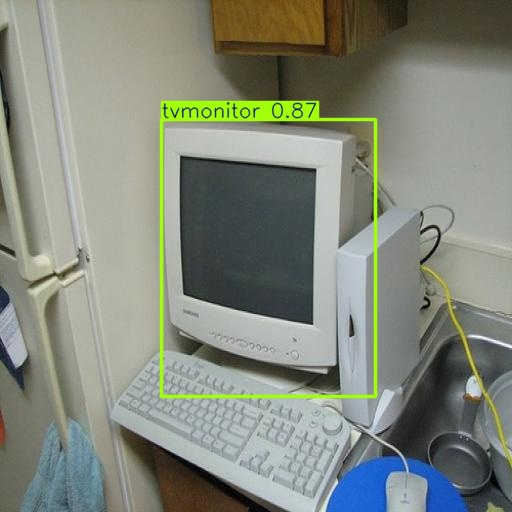

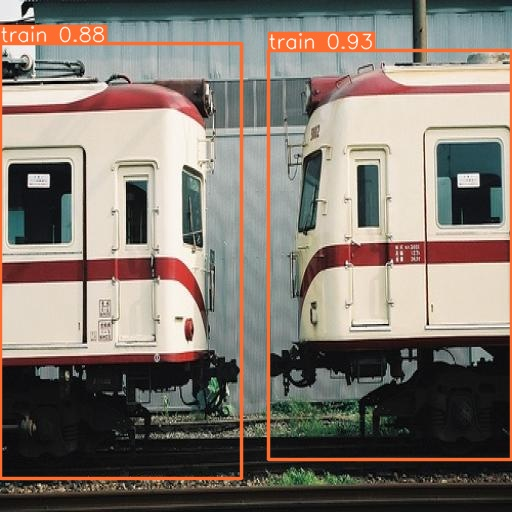

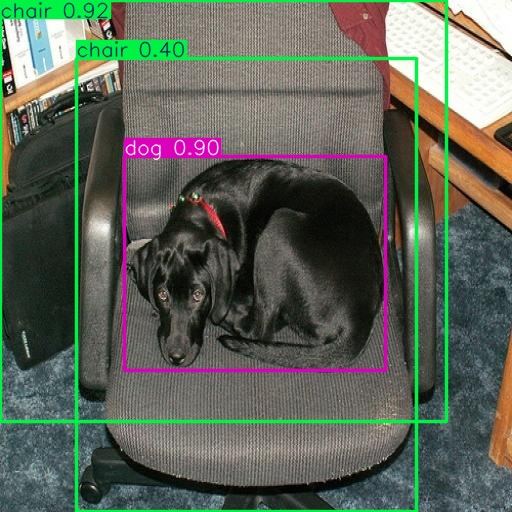

In [ ]:
# ✅ STEP 1: Install Ultralytics (YOLOv8)
!pip install -q ultralytics
from IPython.display import clear_output
clear_output()

import torch
from ultralytics import YOLO
from IPython.display import Image, display
import glob



# ✅ STEP 4: Load the model and run validation
model = YOLO("/content/8l-50-epochsbest.pt")

results = model.val(data="/content/Pascal-VOC-2012-13/data.yaml", split="val")


print(f"📊 mAP@0.5:       {results.box.map50:.4f}")
print(f"📊 mAP@0.5:0.95:   {results.box.map:.4f}")
print(f"📊 Mean Precision: {results.box.mp:.4f}")
print(f"📊 Mean Recall:    {results.box.mr:.4f}")


fixed_images = sorted(glob.glob("/content/Pascal-VOC-2012-13/valid/images/*.jpg"))[:3]

for img_path in fixed_images:
    model.predict(source=img_path, conf=0.25, save=True)

latest_pred_dir = sorted(glob.glob("runs/detect/predict*"))[-1]

print("🖼️ Showing predicted images:")
for img_path in fixed_images:
    filename = img_path.split("/")[-1]
    pred_img_path = f"{latest_pred_dir}/{filename}"
    display(Image(filename=pred_img_path))


yolo8x evaluataion

In [ ]:
!wget 'https://www.dropbox.com/scl/fi/3vwbdnwekgzms3qm5gsjx/8x-50ecpoch-best.pt?rlkey=salqw8r6jqo4qb545zoznd5w1&st=vw2tw6wf&dl=1'

--2025-06-15 11:12:50--  https://www.dropbox.com/scl/fi/3vwbdnwekgzms3qm5gsjx/8x-50ecpoch-best.pt?rlkey=salqw8r6jqo4qb545zoznd5w1&st=vw2tw6wf&dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc214ae808f15dc3697783bfd335.dl.dropboxusercontent.com/cd/0/inline/Cro50TH8UhFaW8BzF65GuBN0yzG-jTvwrNGb8aLyTOFW8Hgo_SKN4U-cqKXfLLaDCAkeqFnONTb2FdQ8tbhISXyJwRARk1_Wt_IjYqVjyckYsD9iQMD7BmN5ITNFToyt4EozZFUCD0jD4uYih0qQsQPc/file?dl=1# [following]
--2025-06-15 11:12:50--  https://uc214ae808f15dc3697783bfd335.dl.dropboxusercontent.com/cd/0/inline/Cro50TH8UhFaW8BzF65GuBN0yzG-jTvwrNGb8aLyTOFW8Hgo_SKN4U-cqKXfLLaDCAkeqFnONTb2FdQ8tbhISXyJwRARk1_Wt_IjYqVjyckYsD9iQMD7BmN5ITNFToyt4EozZFUCD0jD4uYih0qQsQPc/file?dl=1
Resolving uc214ae808f15dc3697783bfd335.dl.dropboxusercontent.com (uc214ae808f15dc3697783bfd335.dl.dropboxuserco

Ultralytics 8.3.155 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 112 layers, 68,142,828 parameters, 0 gradients, 257.5 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1257.9±570.6 MB/s, size: 43.9 KB)


val: Scanning /content/Pascal-VOC-2012-13/valid/labels.cache... 3422 images, 120 backgrounds, 0 corrupt: 100%|██████████| 3422/3422 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 214/214 [03:50<00:00,  1.08s/it]


                   all       3422       7836      0.772      0.686      0.757      0.607
             aeroplane        134        194      0.919      0.794      0.876      0.748
               bicycle        107        142      0.597      0.613       0.67      0.529
                  bird        146        215      0.849       0.74      0.808      0.629
                  boat        124        205      0.803      0.654      0.764      0.553
                bottle        166        335      0.663       0.49      0.522      0.387
                   bus         95        148      0.866      0.788       0.84      0.744
                   car        271        503      0.785      0.692      0.781       0.61
                   cat        215        243      0.909      0.858      0.911      0.807
                 chair        257        588      0.674      0.528      0.577      0.442
                   cow         70        133      0.766      0.763      0.818      0.647
           diningtabl

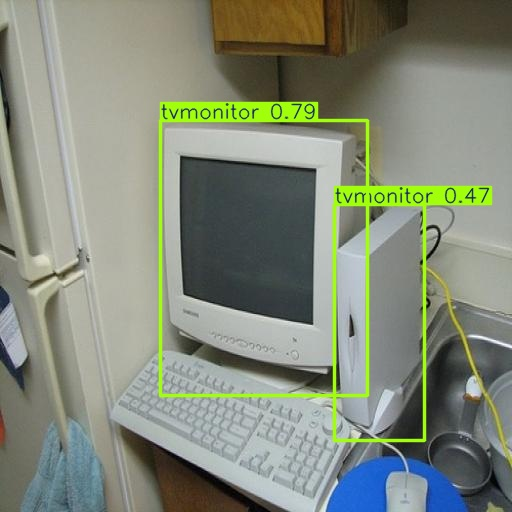

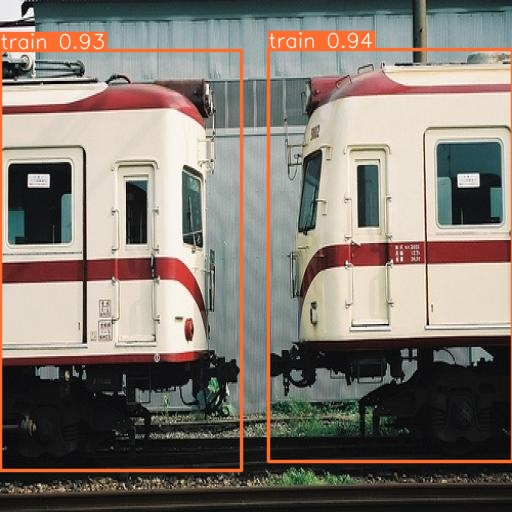

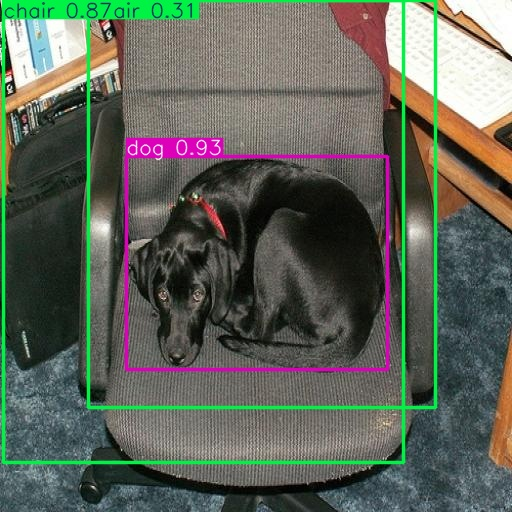

In [ ]:

from IPython.display import clear_output
clear_output()

import torch
from ultralytics import YOLO
from IPython.display import Image, display
import glob

model = YOLO("/content/8x-50ecpoch-best.pt")

results = model.val(data="/content/Pascal-VOC-2012-13/data.yaml", split="val")


print(f"📊 mAP@0.5:       {results.box.map50:.4f}")
print(f"📊 mAP@0.5:0.95:   {results.box.map:.4f}")
print(f"📊 Mean Precision: {results.box.mp:.4f}")
print(f"📊 Mean Recall:    {results.box.mr:.4f}")

fixed_images = sorted(glob.glob("/content/Pascal-VOC-2012-13/valid/images/*.jpg"))[:3]

for img_path in fixed_images:
    model.predict(source=img_path, conf=0.25, save=True)


latest_pred_dir = sorted(glob.glob("runs/detect/predict*"))[-1]

print("🖼️ Showing predicted images:")
for img_path in fixed_images:
    filename = img_path.split("/")[-1]
    pred_img_path = f"{latest_pred_dir}/{filename}"
    display(Image(filename=pred_img_path))


Detr evaluation

In [ ]:
# Clone the original DETR repo
!git clone https://github.com/facebookresearch/detr.git
%cd detr

# Install requirements
!pip install -q -r requirements.txt pycocotools


Cloning into 'detr'...
remote: Enumerating objects: 265, done.
remote: Total 265 (delta 0), reused 0 (delta 0), pack-reused 265 (from 1)
Receiving objects: 100% (265/265), 21.19 MiB | 21.31 MiB/s, done.
Resolving deltas: 100% (120/120), done.
/content/detr
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.5/75.5 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 124.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 61.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 831.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install -q -r requirements.txt pycocotools


  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="YWCnJwSVH5kBXPc3RSoc")
project = rf.workspace("jacob-solawetz").project("pascal-voc-2012")
version = project.version(13)
dataset = version.download("coco")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Pascal-VOC-2012-13 in coco:: 100%|██████████| 30808/30808 [00:08<00:00, 3574.56it/s]


load the model

In [ ]:
!wget 'https://www.dropbox.com/scl/fi/igncpfrpuaqjlepno7m01/detrresnet50.pth?rlkey=cccnl69c5gebl8060ah44xg8s&st=3oljovhi&dl=1'

--2025-06-24 14:28:22--  https://www.dropbox.com/scl/fi/igncpfrpuaqjlepno7m01/detrresnet50.pth?rlkey=cccnl69c5gebl8060ah44xg8s&st=3oljovhi&dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘detrresnet50.pth?rlkey=cccnl69c5gebl8060ah44xg8s&st=3oljovhi&dl=1.1’

detrresnet50.pth?rl     [ <=>                ] 160.70K  --.-KB/s    in 0.08s   

2025-06-24 14:28:22 (2.05 MB/s) - ‘detrresnet50.pth?rlkey=cccnl69c5gebl8060ah44xg8s&st=3oljovhi&dl=1.1’ saved [164555]



In [ ]:
!wget 'https://www.dropbox.com/scl/fi/u8zr5hdu8fhkhzfmdikxv/data-set.zip?rlkey=7wfyly7a0cva0zlsbl3tki8e4&st=mq7s57h3&dl=1'

--2025-06-24 16:38:47--  https://www.dropbox.com/scl/fi/u8zr5hdu8fhkhzfmdikxv/data-set.zip?rlkey=7wfyly7a0cva0zlsbl3tki8e4&st=mq7s57h3&dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6022:18::a27d:4212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc5cf761ee1e6a054ddcb0a536be.dl.dropboxusercontent.com/cd/0/inline/CsOdId7_7FtGZlEwPjwi_8PIqqn_Voi-7WGdRb77yIStwdBn9qMHuU5in91KiUCCdDcVW1w6eaIEEZQofHuwTGE_-3ImF2XwZHMcCEVQwIDz8082Lfi0Mw6E7uXiZlb6iwuZAYz9laZfhPUHvUGv-Dp0/file?dl=1# [following]
--2025-06-24 16:38:47--  https://uc5cf761ee1e6a054ddcb0a536be.dl.dropboxusercontent.com/cd/0/inline/CsOdId7_7FtGZlEwPjwi_8PIqqn_Voi-7WGdRb77yIStwdBn9qMHuU5in91KiUCCdDcVW1w6eaIEEZQofHuwTGE_-3ImF2XwZHMcCEVQwIDz8082Lfi0Mw6E7uXiZlb6iwuZAYz9laZfhPUHvUGv-Dp0/file?dl=1
Resolving uc5cf761ee1e6a054ddcb0a536be.dl.dropboxusercontent.com (uc5cf761ee1e6a054ddcb0a536be.dl.dropboxusercontent.

In [ ]:
!unzip /content/detr/data-set.zip

Streaming output truncated to the last 5000 lines.
  inflating: data-set/train2017/2009_000731_jpg.rf.f350b3cbae5040041caa297547233d09.jpg  
  inflating: data-set/train2017/2011_005835_jpg.rf.2e30f29669026b3a08140d79c47bdf26.jpg  
  inflating: data-set/train2017/2011_001705_jpg.rf.54f1ba28b5746b80f5c037c7c8d3fb98.jpg  
  inflating: data-set/train2017/2010_000238_jpg.rf.5d1c223e9adbe8463b786a4fec9b08d2.jpg  
  inflating: data-set/train2017/2012_002423_jpg.rf.8ba3143852e25749dc1fed3dc0a65d76.jpg  
  inflating: data-set/train2017/2009_001959_jpg.rf.d7c07c774981ec01066cfa09aa609aa2.jpg  
  inflating: data-set/train2017/2009_001689_jpg.rf.98c7ae60a627f0947ff3d98b77eab08c.jpg  
  inflating: data-set/train2017/2008_002873_jpg.rf.09369b78cd9e9a897a231c2d09da90c9.jpg  
  inflating: data-set/train2017/2008_002270_jpg.rf.d5f1ace9a2fd89e6c8b64f9c310f940a.jpg  
  inflating: data-set/train2017/2010_001199_jpg.rf.fcb30f77331a406f9de1c1cb6cd02587.jpg  
  inflating: data-set/train2017/2011_004045_jpg.r

In [ ]:
!wget 'https://www.dropbox.com/scl/fi/8k1zdoobe6mp7z3qpz584/checkpoint-res50-25.pth?rlkey=ep4j2ek3h2uc23h5qt2tolzeg&st=7030rihi&dl=1'

--2025-06-15 13:54:07--  https://www.dropbox.com/scl/fi/8k1zdoobe6mp7z3qpz584/checkpoint-res50-25.pth?rlkey=ep4j2ek3h2uc23h5qt2tolzeg&st=7030rihi&dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc60cb77b23048322c0764f12032.dl.dropboxusercontent.com/cd/0/inline/CrovUjl8CrU2YvV0KUJfoWuqxI67CPWUN5T4YITtamV6c4qrxYawZO_3WF8KnKhHCJnDQvXz2WSigPXv7YTbzy30PeOdRTDKByFngIvMwnMiywMGDtU7iK6d0qPDL_JYC7K3kVvDL1BPGxf1f0yKI4cv/file?dl=1# [following]
--2025-06-15 13:54:07--  https://uc60cb77b23048322c0764f12032.dl.dropboxusercontent.com/cd/0/inline/CrovUjl8CrU2YvV0KUJfoWuqxI67CPWUN5T4YITtamV6c4qrxYawZO_3WF8KnKhHCJnDQvXz2WSigPXv7YTbzy30PeOdRTDKByFngIvMwnMiywMGDtU7iK6d0qPDL_JYC7K3kVvDL1BPGxf1f0yKI4cv/file?dl=1
Resolving uc60cb77b23048322c0764f12032.dl.dropboxusercontent.com (uc60cb77b23048322c0764f12032.dl.dropboxus

In [ ]:
import os
import torch
import pickle
import numpy as np
from main import get_args_parser
from engine import evaluate
import util.misc as utils
from datasets.coco import build as build_coco
from models import build_model

# ✅ Fix for deprecated np.float
np.float = float

# ✅ Parse arguments with valid options
args = get_args_parser().parse_args(["--dataset_file", "voc"])
args.device = "cuda"
args.batch_size = 2
args.num_workers = 2
args.coco_path = "/content/detr/data-set"
args.output_dir = "./output"

args.num_classes = 21  # PASCAL VOC has 20 classes + 1 background

# ✅ Build the model
model, criterion, postprocessors = build_model(args)

# ✅ Load the checkpoint
try:
    checkpoint = torch.load("/content/detr/21c50.pth", map_location=args.device)
except pickle.UnpicklingError:
    print("⚠️ Trying again with weights_only=False...")
    checkpoint = torch.load("/content/detr/21c50.pth", map_location=args.device, weights_only=False)

model.load_state_dict(checkpoint["model"], strict=True)
model = model.to(args.device).eval()
print("✅ Model loaded with", args.num_classes, "classes.")

val_dataset = build_coco(image_set='val', args=args)
val_loader = torch.utils.data.DataLoader(
    val_dataset,
    batch_size=args.batch_size,
    shuffle=False,
    drop_last=False,
    collate_fn=utils.collate_fn,
    num_workers=args.num_workers
)

print("🔍 Running DETR evaluation on validation set...")
evaluate(
    model=model,
    criterion=criterion,
    postprocessors=postprocessors,
    data_loader=val_loader,
    base_ds=val_dataset.coco,
    device=torch.device(args.device),
    output_dir=args.output_dir
)


✅ Model loaded with 21 classes.
loading annotations into memory...
Done (t=0.02s)
creating index...
index created!
🔍 Running DETR evaluation on validation set...
Test:  [   0/1711]  eta: 0:20:47  class_error: 0.00  loss: 2.3831 (2.3831)  loss_ce: 0.0498 (0.0498)  loss_bbox: 0.1732 (0.1732)  loss_giou: 0.0689 (0.0689)  loss_ce_0: 0.0057 (0.0057)  loss_bbox_0: 0.3437 (0.3437)  loss_giou_0: 0.1108 (0.1108)  loss_ce_1: 0.0037 (0.0037)  loss_bbox_1: 0.3580 (0.3580)  loss_giou_1: 0.1284 (0.1284)  loss_ce_2: 0.0107 (0.0107)  loss_bbox_2: 0.4060 (0.4060)  loss_giou_2: 0.1369 (0.1369)  loss_ce_3: 0.0506 (0.0506)  loss_bbox_3: 0.1730 (0.1730)  loss_giou_3: 0.0737 (0.0737)  loss_ce_4: 0.0480 (0.0480)  loss_bbox_4: 0.1712 (0.1712)  loss_giou_4: 0.0708 (0.0708)  loss_ce_unscaled: 0.0498 (0.0498)  class_error_unscaled: 0.0000 (0.0000)  loss_bbox_unscaled: 0.0346 (0.0346)  loss_giou_unscaled: 0.0344 (0.0344)  cardinality_error_unscaled: 0.5000 (0.5000)  loss_ce_0_unscaled: 0.0057 (0.0057)  loss_bbox_

({'class_error': 16.886531916785003,
  'loss': 4.116618204750839,
  'loss_ce': 0.21350202470122473,
  'loss_bbox': 0.2099881349430838,
  'loss_giou': 0.24026507789988674,
  'loss_ce_0': 0.2412876782923257,
  'loss_bbox_0': 0.23670533415494016,
  'loss_giou_0': 0.2662070010125219,
  'loss_ce_1': 0.22428866821465523,
  'loss_bbox_1': 0.22452589257253952,
  'loss_giou_1': 0.25050356692494635,
  'loss_ce_2': 0.21601966638610123,
  'loss_bbox_2': 0.21698913659545532,
  'loss_giou_2': 0.24520145020377454,
  'loss_ce_3': 0.21203598676354232,
  'loss_bbox_3': 0.21314569138325773,
  'loss_giou_3': 0.2417965225466053,
  'loss_ce_4': 0.2129322059117372,
  'loss_bbox_4': 0.21085542450974135,
  'loss_giou_4': 0.24036876363151782,
  'loss_ce_unscaled': 0.21350202470122473,
  'class_error_unscaled': 16.886531916785003,
  'loss_bbox_unscaled': 0.04199762694338421,
  'loss_giou_unscaled': 0.12013253894994337,
  'cardinality_error_unscaled': 1.3930450029222676,
  'loss_ce_0_unscaled': 0.2412876782923257

In [ ]:
import os
import torch
import pickle
import numpy as np
from main import get_args_parser
from engine import evaluate
import util.misc as utils
from datasets.coco import build as build_coco
from models import build_model
import pandas as pd

# ✅ Fix for deprecated np.float
np.float = float

# ✅ Parse arguments with valid options
args = get_args_parser().parse_args(["--dataset_file", "voc"])
args.device = "cuda"
args.batch_size = 2
args.num_workers = 2
args.coco_path = "/content/detr/data-set"
args.output_dir = "./output"

# ✅ Set correct number of classes BEFORE model creation
args.num_classes = 21  # PASCAL VOC has 20 classes + 1 background

# ✅ Build the model
model, criterion, postprocessors = build_model(args)

# ✅ Load the checkpoint
try:
    checkpoint = torch.load("/content/detr/21c50.pth", map_location=args.device)
except pickle.UnpicklingError:
    print("⚠️ Trying again with weights_only=False...")
    checkpoint = torch.load("/content/detr/21c50.pth", map_location=args.device, weights_only=False)

# ✅ Load model weights (strict=True now works)
model.load_state_dict(checkpoint["model"], strict=True)
model = model.to(args.device).eval()
print("✅ Model loaded with", args.num_classes, "classes.")

# ✅ Build validation dataset
val_dataset = build_coco(image_set='val', args=args)
val_loader = torch.utils.data.DataLoader(
    val_dataset,
    batch_size=args.batch_size,
    shuffle=False,
    drop_last=False,
    collate_fn=utils.collate_fn,
    num_workers=args.num_workers
)
# Evaluate
print("🔍 Running DETR evaluation on validation set...")
stats, coco_evaluator = evaluate(
    model=model,
    criterion=criterion,
    postprocessors=postprocessors,
    data_loader=val_loader,
    base_ds=val_dataset.coco,
    device=torch.device(args.device),
    output_dir=args.output_dir
)

# Extract COCO stats
coco_stats = coco_evaluator.coco_eval['bbox'].stats
metric_names = [
    "mAP@0.5:0.95 (all)", "mAP@0.5", "mAP@0.75",
    "mAP (small)", "mAP (medium)", "mAP (large)",
    "AR@1", "AR@10", "AR@100", "AR (small)", "AR (medium)", "AR (large)"
]

# Print metrics
print("\n📊 Evaluation Summary (COCO metrics):")
for name, value in zip(metric_names, coco_stats):
    print(f"{name:<20}: {value:.4f}")

# Optionally: Save results to CSV
results_dict = dict(zip(metric_names, coco_stats))
df = pd.DataFrame([results_dict])
df.to_csv("detr_eval_results.csv", index=False)
print("✅ Results saved to detr_eval_results.csv")

✅ Model loaded with 21 classes.
loading annotations into memory...
Done (t=0.02s)
creating index...
index created!
🔍 Running DETR evaluation on validation set...
Test:  [   0/1711]  eta: 0:14:47  class_error: 0.00  loss: 2.3831 (2.3831)  loss_ce: 0.0498 (0.0498)  loss_bbox: 0.1732 (0.1732)  loss_giou: 0.0689 (0.0689)  loss_ce_0: 0.0057 (0.0057)  loss_bbox_0: 0.3437 (0.3437)  loss_giou_0: 0.1108 (0.1108)  loss_ce_1: 0.0037 (0.0037)  loss_bbox_1: 0.3580 (0.3580)  loss_giou_1: 0.1284 (0.1284)  loss_ce_2: 0.0107 (0.0107)  loss_bbox_2: 0.4060 (0.4060)  loss_giou_2: 0.1369 (0.1369)  loss_ce_3: 0.0506 (0.0506)  loss_bbox_3: 0.1730 (0.1730)  loss_giou_3: 0.0737 (0.0737)  loss_ce_4: 0.0480 (0.0480)  loss_bbox_4: 0.1712 (0.1712)  loss_giou_4: 0.0708 (0.0708)  loss_ce_unscaled: 0.0498 (0.0498)  class_error_unscaled: 0.0000 (0.0000)  loss_bbox_unscaled: 0.0346 (0.0346)  loss_giou_unscaled: 0.0344 (0.0344)  cardinality_error_unscaled: 0.5000 (0.5000)  loss_ce_0_unscaled: 0.0057 (0.0057)  loss_bbox_

NameError: name 'pd' is not defined

In [ ]:

import pandas as pd
# Print metrics
print("\n📊 Evaluation Summary (COCO metrics):")
for name, value in zip(metric_names, coco_stats):
    print(f"{name:<20}: {value:.4f}")

# Optionally: Save results to CSV
results_dict = dict(zip(metric_names, coco_stats))
df = pd.DataFrame([results_dict])
df.to_csv("detr_eval_results.csv", index=False)
print("✅ Results saved to detr_eval_results.csv")



📊 Evaluation Summary (COCO metrics):
mAP@0.5:0.95 (all)  : 0.5469
mAP@0.5             : 0.7207
mAP@0.75            : 0.5894
mAP (small)         : 0.1542
mAP (medium)        : 0.3146
mAP (large)         : 0.6529
AR@1                : 0.4716
AR@10               : 0.6886
AR@100              : 0.7305
AR (small)          : 0.2643
AR (medium)         : 0.5238
AR (large)          : 0.8217
✅ Results saved to detr_eval_results.csv


fasercnn

In [ ]:
import os
import xml.etree.ElementTree as ET
from collections import Counter

annotation_dir = "/content/Pascal-VOC-2012-4/train"  # 🔁 change if needed
label_counts = Counter()

for f in os.listdir(annotation_dir):
    if f.endswith(".xml"):
        tree = ET.parse(os.path.join(annotation_dir, f))
        root = tree.getroot()
        for obj in root.findall("object"):
            label = obj.find("name").text.lower().strip()
            label_counts[label] += 1

print("✅ Labels found in dataset:")
for label, count in label_counts.items():
    print(f"{label:20} → {count} instances")


✅ Labels found in dataset:
cat                  → 274 instances
sofa                 → 173 instances
person               → 3114 instances
bus                  → 126 instances
car                  → 530 instances
train                → 152 instances
pottedplant          → 192 instances
bicycle              → 141 instances
diningtable          → 161 instances
bottle               → 306 instances
chair                → 565 instances
bird                 → 217 instances
boat                 → 171 instances
aeroplane            → 168 instances
horse                → 161 instances
dog                  → 309 instances
motorbike            → 145 instances
tvmonitor            → 185 instances
sheep                → 174 instances
cow                  → 125 instances


In [ ]:
import os
import xml.etree.ElementTree as ET
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as T

# ✅ Define class names and mapping
CLASS_NAMES = [
    "__background__", "aeroplane", "bicycle", "bird", "boat", "bottle",
    "bus", "car", "cat", "chair", "cow", "diningtable", "dog", "horse",
    "motorbike", "person", "pottedplant", "sheep", "sofa", "train", "tvmonitor"
]
CLASS_MAP = {name: idx for idx, name in enumerate(CLASS_NAMES)}

# ✅ Define your dataset class
class VOCDataset(Dataset):
    def __init__(self, root, transforms=None):
        self.root = root
        self.transforms = transforms
        self.files = [f for f in os.listdir(root) if f.endswith(".xml")]
        if len(self.files) == 0:
            raise RuntimeError(f"No annotation files found in: {root}")

    def __len__(self):
        return len(self.files)

    def __getitem__(self, idx):
        xml_file = self.files[idx]
        img_file = xml_file.replace(".xml", ".jpg")
        img_path = os.path.join(self.root, img_file)
        xml_path = os.path.join(self.root, xml_file)

        image = Image.open(img_path).convert("RGB")

        boxes, labels = [], []

        tree = ET.parse(xml_path)
        root = tree.getroot()

        for obj in root.findall("object"):
            label = obj.find("name").text.lower().strip()
            if label not in CLASS_MAP:
                continue
            bbox = obj.find("bndbox")
            xmin = float(bbox.find("xmin").text)
            ymin = float(bbox.find("ymin").text)
            xmax = float(bbox.find("xmax").text)
            ymax = float(bbox.find("ymax").text)
            boxes.append([xmin, ymin, xmax, ymax])
            labels.append(CLASS_MAP[label])

        boxes = torch.tensor(boxes, dtype=torch.float32) if boxes else torch.zeros((0, 4), dtype=torch.float32)
        labels = torch.tensor(labels, dtype=torch.int64) if labels else torch.zeros((0,), dtype=torch.int64)

        target = {
            "boxes": boxes,
            "labels": labels,
            "image_id": torch.tensor([idx])
        }

        if self.transforms:
            image = self.transforms(image)

        return image, target

# ✅ Define the transform
transform = T.Compose([T.ToTensor()])

# ✅ Path to your training data (adjust this if needed)
train_path = "/content/Pascal-VOC-2012-4/train"

# ✅ Create dataset and loader
dataset = VOCDataset(train_path, transforms=transform)
inspect_loader = DataLoader(dataset, batch_size=2, shuffle=True, collate_fn=lambda x: tuple(zip(*x)))

# ✅ Inspect first few samples
for batch_idx, (images, targets) in enumerate(inspect_loader):
    print(f"\n📦 Batch {batch_idx + 1}")
    for i, target in enumerate(targets):
        boxes = target["boxes"]
        labels = target["labels"]
        print(f"  Image {i + 1}:")
        print(f"    → Num Boxes: {len(boxes)}")
        print(f"    → Labels: {[CLASS_NAMES[label.item()] for label in labels]}")
    if batch_idx >= 2:
        break



📦 Batch 1
  Image 1:
    → Num Boxes: 2
    → Labels: ['person', 'motorbike']
  Image 2:
    → Num Boxes: 2
    → Labels: ['bird', 'bird']

📦 Batch 2
  Image 1:
    → Num Boxes: 1
    → Labels: ['car']
  Image 2:
    → Num Boxes: 1
    → Labels: ['person']

📦 Batch 3
  Image 1:
    → Num Boxes: 3
    → Labels: ['cow', 'car', 'person']
  Image 2:
    → Num Boxes: 1
    → Labels: ['bird']


In [ ]:
!wget 'https://www.dropbox.com/scl/fi/bcjbd631x7fyp2gc7dlr0/fasterrcnn_colab15epochs.pt?rlkey=f1o07573u2j27uibzibaoy5rt&st=qcy1758g&dl=1'

--2025-06-25 12:49:46--  https://www.dropbox.com/scl/fi/bcjbd631x7fyp2gc7dlr0/fasterrcnn_colab15epochs.pt?rlkey=f1o07573u2j27uibzibaoy5rt&st=qcy1758g&dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uca7e2de4548f54bb34b6e48a3af.dl.dropboxusercontent.com/cd/0/inline/CsSztIdlExrGBKAPzHo4fNv22smA6IZvOZ9Lv1dPkfjXe4gu8d5LcauTpY3zocWrPMFDCkY8alLEiFlEz7dnCerEZm3CfWWmxGvDawEd1744EOW4wouLtHbOHDgGtF5cUJUOE363ub-MpVndj4RpY1y5/file?dl=1# [following]
--2025-06-25 12:49:46--  https://uca7e2de4548f54bb34b6e48a3af.dl.dropboxusercontent.com/cd/0/inline/CsSztIdlExrGBKAPzHo4fNv22smA6IZvOZ9Lv1dPkfjXe4gu8d5LcauTpY3zocWrPMFDCkY8alLEiFlEz7dnCerEZm3CfWWmxGvDawEd1744EOW4wouLtHbOHDgGtF5cUJUOE363ub-MpVndj4RpY1y5/file?dl=1
Resolving uca7e2de4548f54bb34b6e48a3af.dl.dropboxusercontent.com (uca7e2de4548f54bb34b6e48a3af.dl.dr

In [ ]:
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

# Match the class names used during training
CLASS_NAMES = [
    "__background__",  # index 0
    "aeroplane", "bicycle", "bird", "boat", "bottle",
    "bus", "car", "cat", "chair", "cow", "diningtable",
    "dog", "horse", "motorbike", "person", "pottedplant",
    "sheep", "sofa", "train", "tvmonitor"
]
num_classes = len(CLASS_NAMES)  # 21

# ✅ Create model
model = fasterrcnn_resnet50_fpn(weights="DEFAULT")
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

# ✅ Load weights
model.load_state_dict(torch.load("/content/fasterrcnn_colab15epochs.pt"))
model.eval()
model.to("cuda" if torch.cuda.is_available() else "cpu")

print("✅ Model ready for inference")


Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:00<00:00, 177MB/s]


✅ Model ready for inference


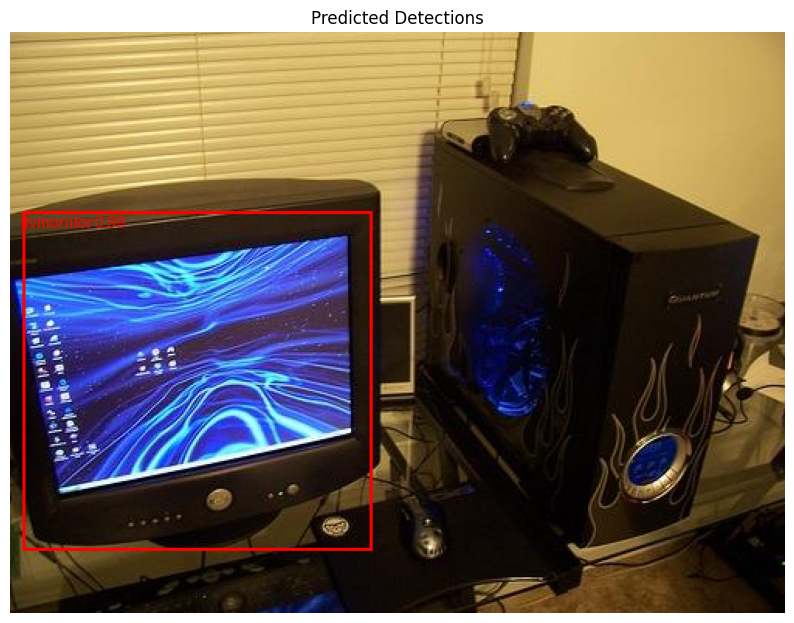

In [ ]:
import matplotlib.pyplot as plt
import torchvision.transforms as T
import torchvision
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import random

# ✅ Pick a sample image from your dataset
sample_img_path = "/content/Pascal-VOC-2012-4/train/2007_000187_jpg.rf.db0783e3934e43eeadd548a389dc65d8.jpg"  # 🔁 change to one of your image paths

# ✅ Load and preprocess image
image = Image.open(sample_img_path).convert("RGB")
transform = T.Compose([T.ToTensor()])
device = next(model.parameters()).device  # get device from model parameters
img_tensor = transform(image).unsqueeze(0).to(device)

# ✅ Run inference
with torch.no_grad():
    outputs = model(img_tensor)

# ✅ Extract outputs
output = outputs[0]
boxes = output['boxes']
labels = output['labels']
scores = output['scores']

# ✅ Draw boxes with confidence > threshold
threshold = 0.5
draw = ImageDraw.Draw(image)
font = ImageFont.load_default()

for box, label, score in zip(boxes, labels, scores):
    if score > threshold:
        box = box.cpu().numpy()
        label_name = CLASS_NAMES[label]
        draw.rectangle(box.tolist(), outline="red", width=2)
        draw.text((box[0], box[1]), f"{label_name} {score:.2f}", fill="red", font=font)

# ✅ Show image
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis("off")
plt.title("Predicted Detections")
plt.show()
